# Problem 0: Word embeddings++ (15%)

### This is an open ended expercise. Our goal is to create a robust set of embeddings by combining many of the techniques that we have learned so far. 

## Part I: Create the embeddings by using techniques such as text cleaning using regex, stemming, ngramming, TfIdf, or whatever else you think may yield good embeddings. (Hint: you may want to consider preserving case information for better entity handling)

In [ ]:
# your code here

## Part II: Think about how we can evaluate our embeddings and compare them to simpler techniques covered in class. (Hint: some basic word statistics and examples can go a long way here)

In [ ]:
# your code here

# Problem 1: Metrics vs Loss functions (10%)
### As we said in lecture, we optimize (minimize) the loss function, but monitor metrics without letting the model know about their value.

### A very common loss/metric pair is crossentropy for the loss and accuracy for the metric. Often, these two numbers correlate, but they are not guaranteed to do some. 

### In this problem, you will come up with 3 sets of 20 synthetic values for predicted probability in a binary classification problem where the crossentropy and accuracy are anti correlated. Plot the loss vs the accuracy.

In [ ]:
# safe to restart
import numpy as np
import pandas as pd
%pylab inline
from sklearn.metrics import accuracy_score

In [ ]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    num_datapoints = predictions.shape[0]
    ce = -1 * np.sum(targets*np.log(predictions + 1e-9)) / num_datapoints
    return ce

In [ ]:
np.random.seed(1234)
x = np.linspace(-.5, 20, 20)
y = 1 / (1 + np.exp(-1 * (x - 8)))

In [ ]:
passfail = ((y + np.random.rand(y.shape[0])) > 0.5).astype(int)
rand_index = np.random.choice(np.arange(y.shape[0]), 20)

In [ ]:
rand_index

In [ ]:
# Hint: not all right and wrong answers are created equally

# y_true  = 
# predictions_1 = ...
# predictions_2 = ...
# predictions_3 = ...

# preds = [predictions_1, predictions_2, predictions_3]

cross_entropies = [cross_entropy(y_pred, y_true) for y_pred in preds]
accuracies = [accuracy_score(y_true, y_pred > 0.5) for y_pred in preds]
pd.Series(accuracies, index=cross_entropies).plot(
    style='-x', figsize=(12,7), fontsize=17,
    markersize=18, linewidth=4
)
plt.xlabel('Cross Entropy', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Problem 2: Cross Validation (10%)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error

### Part 1: Generate some data
 - Generate data with 1024 points and 10 features. 
 - Create targets that are linear combinations of the 10 features and add some noise. 
 - Split the data into train/test 80/20 percent. 

In [ ]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 0, 2, 0, 4, 0, 0])  # notice, there are zeros!
noise_amplitude = 5

# num_variables = ...

# x = ...
# y = ...

# x_train, x_test = ...
# y_train, y_test = ...

# del x, y  

### Part 2: cross validation
Here we will cross validate our data to find the best set of parameters for `Lasso` regression. We will tune the regularization strength (`alpha`) and whether we fit an intercept to the data. 
 - For each set of parameters find fit an estimator
 - Calculate the mean squared error on the test set
 - store the results (both the MSE and the parameters) so we can do analysis later

In [ ]:
# alphas = # make a list of alphas here
# fit_intercepts = # make a list of the two values for `fit_intercept here`

# everything below to be removed
# for all possible combinations, compute necessary metrics
results = []
# put code here

### Part 3: Analysis
 - for each value of `fit_intercept` plot the `MSE` and `r2` scores as a function of alpha. 
 - What is the overall best combination of parameters

In [ ]:
df = pd.DataFrame(results)  # not needed, but maybe handy
# your plotting code here

# Problem 3: Linear regression in Keras (40%)

#### We'd like to use keras to perform linear regression and compare it to another tool (scikit-learn)
#### We'll compare OLS, ridge ($L2$ regularization) and LASSO ($L1$ regularization) using both keras and scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



Populating the interactive namespace from numpy and matplotlib


In [2]:
# Generate some data

num_observations = 1024
coefs = np.array([-1.2, 5, 0, .22, 2, 0, 4])  # notice, there are zeros!
noise_amplitude = .05

num_variables = coefs.shape[0]

x = np.random.rand(num_observations, num_variables)
y = np.dot(x, coefs) + noise_amplitude * np.random.rand(num_observations)


# your code here, 
# split data into x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [3]:
x_train.shape, y_train.shape

((716, 7), (716,))

In [4]:

# fit linear regression here and calculate MSE
# put code here
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.00023008919709061122

In [5]:
# Show that the coefficients are all close the "real" ones used to generate the data
# put code here
print(r2_score(y_test, y_pred))
print(coefs,model.coef_)

0.9999404590436936
[-1.2   5.    0.    0.22  2.    0.    4.  ] [-1.20288764e+00  4.99978795e+00  1.87699595e-03  2.23018685e-01
  2.00302402e+00 -6.86257460e-04  4.00017245e+00]


In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers import Dense
from keras.models import Model, Input
from keras.models import Sequential
from keras import optimizers
import keras.backend as K

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


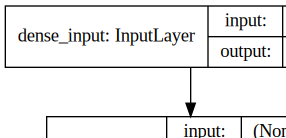

In [7]:
K.clear_session()
# build model here
keras_lin_reg = Sequential()
keras_lin_reg.add(Dense(1, input_dim=x_train.shape[1],name = 'dense'))
# don't forget to compile model here
keras_lin_reg.compile(
    optimizer='sgd', 
    loss='mse', 
)
# plot the model
plot_model_in_notebook(keras_lin_reg)

## How many parameters does the model have? 
### Explicitly show the calculation, explain it, and verify that it agrees with `model.count_params()`

In [8]:
# ADD CODE HERE
keras_lin_reg.count_params()

8

## Fit the model and calculate the MSE

In [9]:
# fit the model here
keras_lin_reg.fit(x_train, y_train, batch_size=512, epochs=2000, shuffle=True)

Epoch 1/2000
716/716 [==============================] - 0s 492us/step - loss: 13.4833
Epoch 2/2000
716/716 [==============================] - 0s 6us/step - loss: 11.1480
Epoch 3/2000
716/716 [==============================] - 0s 4us/step - loss: 9.3038
Epoch 4/2000
716/716 [==============================] - 0s 4us/step - loss: 7.8386
Epoch 5/2000
716/716 [==============================] - 0s 4us/step - loss: 6.6676
Epoch 6/2000
716/716 [==============================] - 0s 6us/step - loss: 5.7327
Epoch 7/2000
716/716 [==============================] - 0s 6us/step - loss: 4.9911
Epoch 8/2000
716/716 [==============================] - 0s 6us/step - loss: 4.3960
Epoch 9/2000
716/716 [==============================] - 0s 6us/step - loss: 3.9408
Epoch 10/2000
716/716 [==============================] - 0s 6us/step - loss: 3.5742
Epoch 11/2000
716/716 [==============================] - 0s 4us/step - loss: 3.2901
Epoch 12/2000
716/716 [==============================] - 0s 4us/step - loss: 3.06

716/716 [==============================] - 0s 4us/step - loss: 0.6588
Epoch 195/2000
716/716 [==============================] - 0s 4us/step - loss: 0.6545
Epoch 196/2000
716/716 [==============================] - 0s 4us/step - loss: 0.6503
Epoch 197/2000
716/716 [==============================] - 0s 4us/step - loss: 0.6461
Epoch 198/2000
716/716 [==============================] - 0s 6us/step - loss: 0.6419
Epoch 199/2000
716/716 [==============================] - 0s 6us/step - loss: 0.6376
Epoch 200/2000
716/716 [==============================] - 0s 3us/step - loss: 0.6334
Epoch 201/2000
716/716 [==============================] - 0s 6us/step - loss: 0.6291
Epoch 202/2000
716/716 [==============================] - 0s 6us/step - loss: 0.6251
Epoch 203/2000
716/716 [==============================] - 0s 7us/step - loss: 0.6211
Epoch 204/2000
716/716 [==============================] - 0s 4us/step - loss: 0.6170
Epoch 205/2000
716/716 [==============================] - 0s 6us/step - loss: 0.

716/716 [==============================] - 0s 4us/step - loss: 0.1927
Epoch 387/2000
716/716 [==============================] - 0s 6us/step - loss: 0.1915
Epoch 388/2000
716/716 [==============================] - 0s 4us/step - loss: 0.1904
Epoch 389/2000
716/716 [==============================] - 0s 4us/step - loss: 0.1892
Epoch 390/2000
716/716 [==============================] - 0s 3us/step - loss: 0.1880
Epoch 391/2000
716/716 [==============================] - 0s 6us/step - loss: 0.1870
Epoch 392/2000
716/716 [==============================] - 0s 7us/step - loss: 0.1857
Epoch 393/2000
716/716 [==============================] - 0s 6us/step - loss: 0.1846
Epoch 394/2000
716/716 [==============================] - 0s 4us/step - loss: 0.1835
Epoch 395/2000
716/716 [==============================] - 0s 6us/step - loss: 0.1824
Epoch 396/2000
716/716 [==============================] - 0s 6us/step - loss: 0.1812
Epoch 397/2000
716/716 [==============================] - 0s 6us/step - loss: 0.

716/716 [==============================] - 0s 4us/step - loss: 0.0609
Epoch 579/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0606
Epoch 580/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0603
Epoch 581/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0599
Epoch 582/2000
716/716 [==============================] - 0s 3us/step - loss: 0.0596
Epoch 583/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0592
Epoch 584/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0589
Epoch 585/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0585
Epoch 586/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0582
Epoch 587/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0579
Epoch 588/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0575
Epoch 589/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

716/716 [==============================] - 0s 6us/step - loss: 0.0216
Epoch 771/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0215
Epoch 772/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0214
Epoch 773/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0213
Epoch 774/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0212
Epoch 775/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0211
Epoch 776/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0209
Epoch 777/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0208
Epoch 778/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0207
Epoch 779/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0206
Epoch 780/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0205
Epoch 781/2000
716/716 [==============================] - 0s 6us/step - loss: 0.

716/716 [==============================] - 0s 6us/step - loss: 0.0090
Epoch 963/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0090
Epoch 964/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0089
Epoch 965/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0089
Epoch 966/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0089
Epoch 967/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0088
Epoch 968/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0088
Epoch 969/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0088
Epoch 970/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0087
Epoch 971/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0087
Epoch 972/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0087
Epoch 973/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

716/716 [==============================] - 0s 4us/step - loss: 0.0045
Epoch 1153/2000
716/716 [==============================] - 0s 3us/step - loss: 0.0045
Epoch 1154/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0045
Epoch 1155/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0045
Epoch 1156/2000
716/716 [==============================] - 0s 3us/step - loss: 0.0045
Epoch 1157/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0044
Epoch 1158/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0044
Epoch 1159/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0044
Epoch 1160/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0044
Epoch 1161/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0044
Epoch 1162/2000
716/716 [==============================] - 0s 3us/step - loss: 0.0044
Epoch 1163/2000
716/716 [==============================] - 0s 6us/step

716/716 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 1342/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 1343/2000
716/716 [==============================] - ETA: 0s - loss: 0.002 - 0s 4us/step - loss: 0.0026
Epoch 1344/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 1345/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 1346/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 1347/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 1348/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0026
Epoch 1349/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0026
Epoch 1350/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 1351/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0025
Epoch 1352/2000
716/716 [=====================

716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1532/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0016
Epoch 1533/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1534/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1535/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1536/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1537/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0016
Epoch 1538/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1539/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1540/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1541/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0016
Epoch 1542/2000
716/716 [==============================] - 0s 4us/step

716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1722/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 1723/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1724/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1725/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1726/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1727/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1728/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 1729/2000
716/716 [==============================] - 0s 4us/step - loss: 0.0011
Epoch 1730/2000
716/716 [==============================] - 0s 7us/step - loss: 0.0011
Epoch 1731/2000
716/716 [==============================] - 0s 6us/step - loss: 0.0011
Epoch 1732/2000
716/716 [==============================] - 0s 4us/step

716/716 [==============================] - 0s 6us/step - loss: 7.8919e-04
Epoch 1905/2000
716/716 [==============================] - 0s 4us/step - loss: 7.8778e-04
Epoch 1906/2000
716/716 [==============================] - 0s 7us/step - loss: 7.8640e-04
Epoch 1907/2000
716/716 [==============================] - 0s 4us/step - loss: 7.8507e-04
Epoch 1908/2000
716/716 [==============================] - 0s 4us/step - loss: 7.8373e-04
Epoch 1909/2000
716/716 [==============================] - 0s 4us/step - loss: 7.8253e-04
Epoch 1910/2000
716/716 [==============================] - 0s 6us/step - loss: 7.8112e-04
Epoch 1911/2000
716/716 [==============================] - 0s 4us/step - loss: 7.7979e-04
Epoch 1912/2000
716/716 [==============================] - 0s 4us/step - loss: 7.7836e-04
Epoch 1913/2000
716/716 [==============================] - 0s 6us/step - loss: 7.7705e-04
Epoch 1914/2000
716/716 [==============================] - 0s 4us/step - loss: 7.7575e-04
Epoch 1915/2000
716/716 [=

In [10]:
# calculate mse
y_pred = keras_lin_reg.predict(x_test)
mean_squared_error(y_test, y_pred)

0.0006697079189052226

## get the coefficients and compare them to the real coefficients

In [11]:
# add code here
lin_reg_coefs, _ = keras_lin_reg.get_layer('dense').get_weights()
lin_reg_coefs = np.squeeze(lin_reg_coefs)
print(coefs)
print(lin_reg_coefs)

[-1.2   5.    0.    0.22  2.    0.    4.  ]
[-1.2312144   4.970723   -0.02398919  0.18890736  1.9724377  -0.02461101
  3.9726694 ]


## Now we will add some regularization

In [12]:
from keras.regularizers import l1_l2
regularizer = l1_l2(l1=0, l2=0.01)
 # Dense(...) -> Dense(..., kernel_regularizer=regularizer)
    
keras_ridge_model = Sequential()

keras_ridge_model.add(Dense(1, input_dim=x_train.shape[1],kernel_regularizer=regularizer,name = 'dense'))
keras_ridge_model.compile(
    optimizer='sgd', 
    loss='mse', 
)
keras_ridge_model.fit(x_train, y_train, batch_size=512, epochs=2000, shuffle=True)

Epoch 1/2000
716/716 [==============================] - 0s 53us/step - loss: 28.1862
Epoch 2/2000
716/716 [==============================] - 0s 4us/step - loss: 22.9117
Epoch 3/2000
716/716 [==============================] - 0s 6us/step - loss: 18.6911
Epoch 4/2000
716/716 [==============================] - 0s 4us/step - loss: 15.4046
Epoch 5/2000
716/716 [==============================] - 0s 4us/step - loss: 12.7911
Epoch 6/2000
716/716 [==============================] - 0s 6us/step - loss: 10.6991
Epoch 7/2000
716/716 [==============================] - 0s 6us/step - loss: 9.0403
Epoch 8/2000
716/716 [==============================] - 0s 6us/step - loss: 7.7367
Epoch 9/2000
716/716 [==============================] - 0s 6us/step - loss: 6.6888
Epoch 10/2000
716/716 [==============================] - 0s 6us/step - loss: 5.8518
Epoch 11/2000
716/716 [==============================] - 0s 4us/step - loss: 5.1826
Epoch 12/2000
716/716 [==============================] - 0s 4us/step - loss: 4

716/716 [==============================] - 0s 6us/step - loss: 0.9956
Epoch 195/2000
716/716 [==============================] - 0s 6us/step - loss: 0.9915
Epoch 196/2000
716/716 [==============================] - 0s 6us/step - loss: 0.9876
Epoch 197/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9835
Epoch 198/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9795
Epoch 199/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9755
Epoch 200/2000
716/716 [==============================] - 0s 6us/step - loss: 0.9716
Epoch 201/2000
716/716 [==============================] - 0s 6us/step - loss: 0.9677
Epoch 202/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9638
Epoch 203/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9597
Epoch 204/2000
716/716 [==============================] - 0s 4us/step - loss: 0.9558
Epoch 205/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

716/716 [==============================] - 0s 4us/step - loss: 0.5681
Epoch 387/2000
716/716 [==============================] - 0s 6us/step - loss: 0.5671
Epoch 388/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5661
Epoch 389/2000
716/716 [==============================] - 0s 6us/step - loss: 0.5651
Epoch 390/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5640
Epoch 391/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5631
Epoch 392/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5621
Epoch 393/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5611
Epoch 394/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5601
Epoch 395/2000
716/716 [==============================] - 0s 4us/step - loss: 0.5592
Epoch 396/2000
716/716 [==============================] - 0s 6us/step - loss: 0.5582
Epoch 397/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

716/716 [==============================] - 0s 6us/step - loss: 0.4611
Epoch 579/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4609
Epoch 580/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4606
Epoch 581/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4604
Epoch 582/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4601
Epoch 583/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4599
Epoch 584/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4596
Epoch 585/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4594
Epoch 586/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4591
Epoch 587/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4589
Epoch 588/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4586
Epoch 589/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

Epoch 674/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4425
Epoch 675/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4423
Epoch 676/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4422
Epoch 677/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4420
Epoch 678/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4419
Epoch 679/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4418
Epoch 680/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4416
Epoch 681/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4415
Epoch 682/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4414
Epoch 683/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4412
Epoch 684/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4411
Epoch 685/2000
716/716 [==============================] - 0s 6us/

716/716 [==============================] - 0s 3us/step - loss: 0.4269
Epoch 867/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4269
Epoch 868/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4268
Epoch 869/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4268
Epoch 870/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4268
Epoch 871/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4267
Epoch 872/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4267
Epoch 873/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4266
Epoch 874/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4266
Epoch 875/2000
716/716 [==============================] - 0s 7us/step - loss: 0.4266
Epoch 876/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4265
Epoch 877/2000
716/716 [==============================] - 0s 4us/step - loss: 0.

716/716 [==============================] - 0s 4us/step - loss: 0.4217
Epoch 1058/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4217
Epoch 1059/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4217
Epoch 1060/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1061/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1062/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1063/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1064/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1065/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4216
Epoch 1066/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4216
Epoch 1067/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4215
Epoch 1068/2000
716/716 [==============================] - 0s 4us/step

716/716 [==============================] - 0s 4us/step - loss: 0.4204
Epoch 1153/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4204
Epoch 1154/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4204
Epoch 1155/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4204
Epoch 1156/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4204
Epoch 1157/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4204
Epoch 1158/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4203
Epoch 1159/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4203
Epoch 1160/2000
716/716 [==============================] - 0s 7us/step - loss: 0.4203
Epoch 1161/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4203
Epoch 1162/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4203
Epoch 1163/2000
716/716 [==============================] - 0s 6us/step

716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1343/2000
716/716 [==============================] - ETA: 0s - loss: 0.417 - 0s 6us/step - loss: 0.4189
Epoch 1344/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1345/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1346/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1347/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4189
Epoch 1348/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4189
Epoch 1349/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4189
Epoch 1350/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1351/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4189
Epoch 1352/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4188
Epoch 1353/2000
716/716 [=====================

716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1438/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4184
Epoch 1439/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4184
Epoch 1440/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1441/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1442/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1443/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4184
Epoch 1444/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1445/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1446/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1447/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4184
Epoch 1448/2000
716/716 [==============================] - 0s 4us/step

716/716 [==============================] - 0s 3us/step - loss: 0.4178
Epoch 1628/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1629/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4178
Epoch 1630/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1631/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1632/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4178
Epoch 1633/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1634/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4178
Epoch 1635/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1636/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4178
Epoch 1637/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4178
Epoch 1638/2000
716/716 [==============================] - 0s 4us/step

716/716 [==============================] - 0s 6us/step - loss: 0.4174
Epoch 1818/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1819/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4174
Epoch 1820/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4174
Epoch 1821/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1822/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1823/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4174
Epoch 1824/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1825/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1826/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1827/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4174
Epoch 1828/2000
716/716 [==============================] - 0s 6us/step

716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1913/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1914/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1915/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4173
Epoch 1916/2000
716/716 [==============================] - 0s 3us/step - loss: 0.4173
Epoch 1917/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1918/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1919/2000
716/716 [==============================] - 0s 6us/step - loss: 0.4173
Epoch 1920/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1921/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1922/2000
716/716 [==============================] - 0s 4us/step - loss: 0.4173
Epoch 1923/2000
716/716 [==============================] - 0s 4us/step

In [13]:
# fit the model and calculate the MSE
y_pred = keras_ridge_model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.04646124094943338

In [14]:
# find the coefficients and compare them to the real ones
keras_ridge_coefs,_ = keras_ridge_model.get_layer('dense').get_weights()
keras_ridge_coefs = np.squeeze(keras_ridge_coefs)
pd.Series(keras_ridge_coefs, name='keras ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,keras ridge coefficients,real coefficients
0,-1.111890,-1.20
1,4.443430,5.00
2,-0.022920,0.00
3,0.167660,0.22
4,1.774354,2.00
5,0.001171,0.00
6,3.574119,4.00


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=100)
ridge.fit(x_train, y_train)
pd.Series(ridge.coef_, name='ridge coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,ridge coefficients,real coefficients
0,-0.486574,-1.20
1,1.871760,5.00
2,-0.009210,0.00
3,0.074885,0.22
4,0.775366,2.00
5,0.057635,0.00
6,1.558466,4.00


In [16]:
# compare coefficients from various methods
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(coefs, name='real coefs')
], axis=1)

,ridge coefs,keras L2 coefs,real coefs
0,-0.486574,-1.111890,-1.20
1,1.871760,4.443430,5.00
2,-0.009210,-0.022920,0.00
3,0.074885,0.167660,0.22
4,0.775366,1.774354,2.00
5,0.057635,0.001171,0.00
6,1.558466,3.574119,4.00


## In fact, given the zero coefficients, LASSO might have been a better model. 
## LASSO uses $L_{1}$ regularization which will make sparse coefficients (some are zero).

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(x_train, y_train)

lasso_coefs = lasso.coef_

pd.Series(lasso_coefs, name='lasso coefficients').to_frame().join(pd.Series(coefs, name='real coefficients'))

,lasso coefficients,real coefficients
0,-0.165870,-1.20
1,3.764721,5.00
2,-0.000000,0.00
3,0.000000,0.22
4,0.917625,2.00
5,0.000000,0.00
6,2.890205,4.00


In [3]:
regularizer = l1_l2(l1=0.1, l2=0)  # to be removed

keras_lasso_model = Sequential()
keras_lasso_model.add(Dense(1, input_dim=x_train.shape[1], kernel_regularizer=regularizer, name="Dense"))
keras_lasso_model.compile(
    optimizer='sgd', 
    loss='mse', 
)
#keras_lasso_model = ...
keras_ridge_model.fit(x_train, y_train, batch_size=512, epochs=2000, shuffle=True)

NameError: name 'l1_l2' is not defined

In [19]:

keras_lasso_coefs, _ = keras_lasso_model.get_layer('Dense').get_weights()
keras_lasso_coefs = np.squeeze(keras_lasso_coefs)

In [20]:
# compare all the coefficients
pd.concat([
    pd.Series(ridge.coef_, name='ridge coefs'),
    pd.Series(keras_ridge_coefs, name='keras L2 coefs'),
    pd.Series(lasso.coef_, name='lasso coefs'),
    pd.Series(keras_lasso_coefs, name='keras L1 coefs'),
    pd.Series(model.coef_, name='ols coefs'),
    pd.Series(coefs, name='real coefs'),
], axis=1)

,ridge coefs,keras L2 coefs,lasso coefs,keras L1 coefs,ols coefs,real coefs
0,-0.486574,-1.111890,-0.165870,-0.319739,-1.202888,-1.20
1,1.871760,4.443430,3.764721,-0.468805,4.999788,5.00
2,-0.009210,-0.022920,-0.000000,-0.698517,0.001877,0.00
3,0.074885,0.167660,0.000000,0.594681,0.223019,0.22
4,0.775366,1.774354,0.917625,-0.067772,2.003024,2.00
5,0.057635,0.001171,0.000000,0.323461,-0.000686,0.00
6,1.558466,3.574119,2.890205,0.731109,4.000172,4.00


## Comment on the results

OLS actually did the best job regarding to the similarity of estimates to the real coefficients, so OLS would produce the best result compared to other methods we used. It make sense because Lasso and Ridge are more like methods to make those "big" variables stand out and becomes easier to identify. Also, there are huge differences in coefficients between keras and sklearn because of the different optimization methods in these two packages. 

In [ ]:
# Safe to restart here

# Problem 4: Custom Loss Functions (10%)
### In this problem we will explore the use of custom loss function to better capture desired behavior in a model.
### In particular, we will examine the tradeoff between false positives and true positives

In [ ]:
# safe to restart here

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
%pylab inline

# many of these to be removed
# Insert necessary imports here

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Part 0: Data preparation
 - ### Load the `mnist` data and subset the data only to the classes `4` and `9`
 - ### This way we have a binary classification task for simplicity

In [2]:
from keras.utils import to_categorical
import keras.layers as KL

def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


def subset_to_9_and_4(x, y):  # this is a new function
    # insert code here:
    # new_x should be x where y is either 4 or 9
    # new_y should be true if y == 4 and False is y = 9
    # return new_x, new_y
    filter_4_and_9 = np.where((y == 4 ) | (y == 9))
    new_x = x[filter_4_and_9]
    new_y = np.isin(y[filter_4_and_9],4)
    return new_x,new_y

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)

num_classes = np.unique(y_train).shape[0]

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)

x_train, y_train = subset_to_9_and_4(x_train, y_train)
x_test, y_test = subset_to_9_and_4(x_test, y_test)

print(x_test.shape)

(1991, 784)


## Part 1: fit logistic regression in `scikit-learn` and compute the true positive and false positive rates

In [3]:
%%time
# insert code here
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(bool)

Wall time: 1.18 s


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
y_pred

array([ True,  True, False, ...,  True, False,  True])

In [5]:
# put your code here
total_predicted_pos = sum(y_pred)
total_true_pos = sum(y_test) 
correct_predicted_pos = (y_pred&y_test).sum()

tpr =  correct_predicted_pos / total_true_pos
fpr =  (total_predicted_pos - correct_predicted_pos)/ (len(y_test) - total_true_pos)
fnr =  1 - tpr
print('false positive rate {:.3f}'.format(fpr))
print('false negative rate {:.3f}'.format(fnr))

false positive rate 0.029
false negative rate 0.026


## Part 2: A custom loss function
### Write a function that returns a custom loss function
### As a shortcut, we can modify the loss function to be
### $J(\theta )$=`regular crossentropy `  $\times$  $\alpha$ 

### where 
 - ### $\alpha=$ 1 + `weight_factor` (a number greater than 0) for the positive class (`y=1`)
 - ### $\alpha=$ `1` for the negative class (`y=0`)

### Like this we can over weight how much we care about positive examples. 

# $ \\ $
## Function
### Inputs:
 - ### `weight_factor`: the multiplicative factor for how much to weight errors in the `1` class over `0`

### Output:
 - ### a function that has inputs `(y_true, y_pred)` that is a viable keras loss function. 


In [11]:
def get_loss_function(weight_factor):
    def my_cross_entropy(y_true, y_pred):
        y_pred = K.clip(y_pred, 1e-12, 1. - 1e-12)
        data_size = y_pred.shape[0]
        ce = -1 * K.sum(K.log(y_pred) * (y_true * (1.0+weight_factor)))
        ce = ce / data_size
        return ce
    return my_cross_entropy


In [12]:
import keras.layers as KL
import keras.backend as K
from keras import optimizers, Model
from keras.layers import Dense
from keras.models import Sequential

In [13]:
#test
np.random.seed(1)
new_loss = get_loss_function(0)
y1 = np.random.randn(30)
y2 = np.random.randn(30)
print(new_loss(y2, y1))

tf.Tensor(3.487452308537907, shape=(), dtype=float64)


## Part 3: Fit Models with Different `weight_factors`
## Steps
 - ### For values in `np.linspace(0, 20, 50)` fit logistic regression in keras.
 - ### For each model compute the true positive and false positive rate
 - ### Make a plot of true positives and false positives as a function of `weight_factor`
 - ### Make a plot of true positives as a function of false positives

In [49]:
res = {}

wt_list = []
Tpr = []
Fpr = []
y_train = y_train.astype(np.float32)

for wt in np.linspace(0, 20, 50):
    K.clear_session()
    digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
    output = Dense(1,activation='sigmoid')(digit_input)

    model = Model(inputs=digit_input, outputs=output)
    loss_function = get_loss_function(wt)
    model.compile(optimizer = 'sgd', loss = loss_function) 

    
    model.fit(x_train, y_train, batch_size=1, epochs=100, shuffle=True)
    
    y_pred = model.predict(x_test).squeeze()
    y_pred = (y_pred > 0.5).astype(int)
    y_test = (y_test > 0.5).astype(int)

    total_predictions = y_pred.shape[0]

    tpr =  (y_pred&y_test).sum()/total_predictions
    fpr =  (y_pred&(1-y_test)).sum()/total_predictions

    wt_list.append(wt)
    Tpr.append(tpr)
    Fpr.append(fpr)

ValueError: None values not supported.

In [ ]:
# true positives as a function of false positives

## Part 4: Thresholding vs Loss Function
### What is the difference between using regular crossentropy and changing thresholds vs changing the loss function? 
### Typically, we consider anything with a predicted probability of 0.5 or above to be a positive example. What if we change this number?

## Steps:
 - ### Fit logistic regression in keras with the regular (crossentropy) loss function
 - ### Find the false positive and true positive rates as a function of the `threshold` for which we consider a positive example. 
 - ### Make a plot of false positives as a function of true positives for this thresholding method.
 - ### On the same axes, plot the old curve of false positives as a function of true positives
 - ### Comment on what you find- what are the advantages and disadvantages of these two methods.

In [42]:
K.clear_session()
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
# your code goes here
output = Dense(1,activation='sigmoid')(digit_input)
model = Model(digit_input, output)
model.compile(
    optimizer='sgd', 
    loss='binary_crossentropy', 
)
model.fit(x_train, y_train, batch_size=512, epochs=100, shuffle=True)

Epoch 1/100
11791/11791 [==============================] - 0s 7us/step - loss: 0.6712
Epoch 2/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.5980
Epoch 3/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.5444
Epoch 4/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.5020
Epoch 5/100
11791/11791 [==============================] - 0s 5us/step - loss: 0.4680
Epoch 6/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.4401
Epoch 7/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.4166
Epoch 8/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.3963
Epoch 9/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.3788
Epoch 10/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.3632
Epoch 11/100
11791/11791 [==============================] - 0s 4us/step - loss: 0.3496
Epoch 12/100
11791/11791 [==========================

In [43]:
pred_proba = model.predict(x_test).squeeze()
total_predictions = pred_proba.shape[0]
Tpr = []
Fpr = []
thresholds = []
for threshold in np.linspace(0.01, 0.099, 50):
    y_pred = (pred_proba > threshold).astype(int)
    tpr =  (y_pred&y_test).sum()/total_predictions
    fpr =  (y_pred&(1-y_test)).sum()/total_predictions
    Tpr.append(tpr)
    Fpr.append(fpr)
    thresholds.append(threshold)

result_all = {'Threshold': thresholds, "Tpr": Tpr, "Fpr": Fpr}

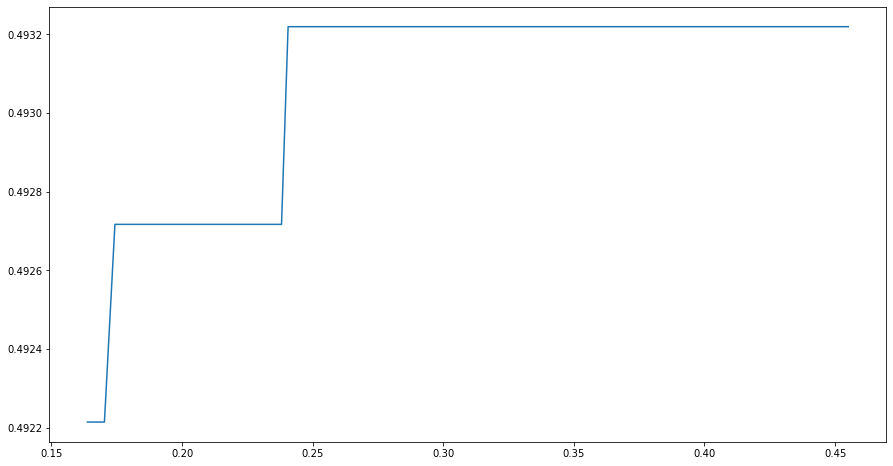

In [48]:
# your code here
df_new = pd.DataFrame(result_all)
x = np.array(df_new['Fpr'])
y = np.array(df_new["Tpr"])
plt.plot(df_new['Fpr'], df_new["Tpr"])
plt.show()

In [ ]:
# comments here

In [ ]:
# safe to restart

# Problem 5: Custom Regularization (15%)

In [ ]:
import numpy as np
import pandas as pd
%pylab inline

# many of these to be removed
# necessary imports here

In [ ]:
np.random.seed(1234)
n_points = 2048

x = np.vstack([np.random.randn(n_points) + ii for ii in np.arange(-3, 3)]).T
real_coefs = np.array([1.4, 0.9, .1, -3, 2.2, -1.3])
y = x.dot(real_coefs) + .5 * np.random.randn(n_points)

In [ ]:
x.shape

In [ ]:
pd.Series(y).hist(bins=30, figsize=(12,8))
plt.xlabel('y', fontsize=24)
plt.ylabel('counts', fontsize=24)

## A new regularization
Sometimes, in the social science and in low-data situations a good rule of thumb is that instead of doing linear regression to find the coefficients, we can assume that all the coefficients are the same!

We will implement a variation on this by penalizing the `variance` of the coefficients, instead of the size.

__NOTE__: this is not a good thing to do in this situation- we have coefficients of different sign!

In this problem we will first solve linear regression with keras. Then we will add a custom regularizer to penalize the variance, and see what the effect are. 

# $ \\ $
# $ \\ $
## Part 0: Solve the problem with no regularization
### Steps:
 - ### Partition the data into train/test
 - ### Fit linear regression in keras with no regularization
 - ### Find the `mse` for the test set this model
 - ### Examine the coefficients and make sure they look correct

In [ ]:
# partition the data

In [ ]:
# fit the data 

In [ ]:
from sklearn.metrics import mean_squared_error
# calculate MSE

In [ ]:
# examine coefs and make sure they look right

## Part 1: Add Regularization
## Steps:
 - ### Make a function that given a `weight_factor` returns a well-formed keras regularization function that penalizes the variance of coefficients by this factor. 
 - ### Fit a model with this regularizer with a `weight_factor` of `1.0`. 
 - ### Calculate the `mse` on the test set and examine the coefficients. 

__Note__: the coefficients should be closer together. Are they?


In [ ]:
def make_reg_function(wt_factor):
    def my_reg(weight_matrix):
        # your code here
    return my_reg



In [ ]:
K.clear_session()
inpts = Input(shape=(x_train.shape[1],))
# make and fit a model

In [ ]:
# examine coefs

In [ ]:
# calculate MSE

## Part 2: Turn up the Regularization
## Steps
 - ### Repeat part 1 with the weight factor turned up to many times its initial value
 - ### Calculate the `mse` on the test set
 - ### examine the coefficients and comment
 - ### compare these results to the best constant guess for `y`.

In [ ]:
K.clear_session()
# make and fit a model with MUCH more regularization

In [ ]:
# look at the coefs

In [ ]:
# calculate MSE

## This is not bad.
 - What would the MSE of the best CONSTANT guess for `y`?

In [ ]:
# your code here

## Comments
